# Policy Gradient
***Policy gradient methods*** are a type of reinforcement learning techniques that rely upon optimizing parametrized policies with respect to the *expected return* (long-term cumulative reward) by gradient descent. They do not suffer from many of the problems that have been marring traditional reinforcement learning approaches such as the lack of guarantees of a value function, the intractability problem resulting from uncertain state information and the complexity arising from continuous states & actions. <br /> <br />
**Reinforcement Learning Objective** :
*Maximize the "expected" reward following a parametrized policy*
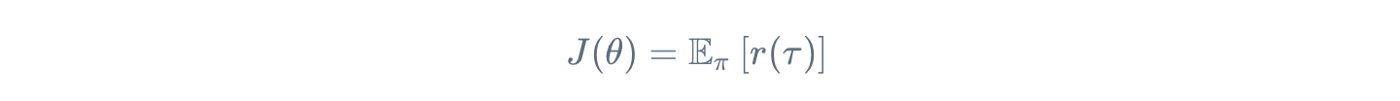

Like any other Machine Learning problem, if we can find the parameters $\theta$ which maximize $J$, we will have solved the task. A standard approach to solving this maximization problem in Machine Learning Literature is to use Gradient Ascent (or Descent). In gradient ascent, we keep stepping through the parameters using the following update rule
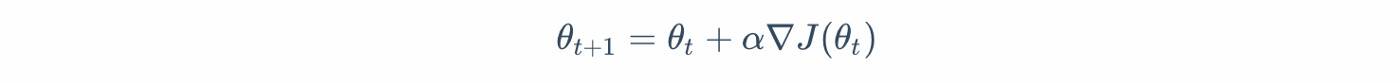

Here comes the challenge, how do we find the gradient of the objective above which contains the expectation. Integrals are always bad in a computational setting. We need to find a way around them. Integrals are always bad in a computational setting. We need to find a way around them. First step is to reformulate the gradient starting with the expansion of expectation (with a slight abuse of notation).

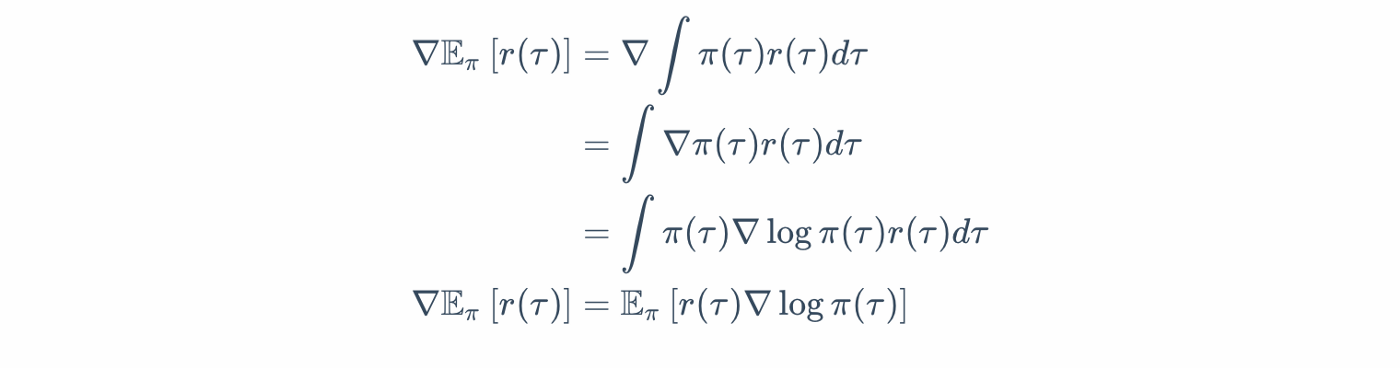

**The Policy Gradient Theorem**: *The derivative of the expected reward is the expectation of the product of the reward and gradient of the log of the policy $\pi_{\theta}$*
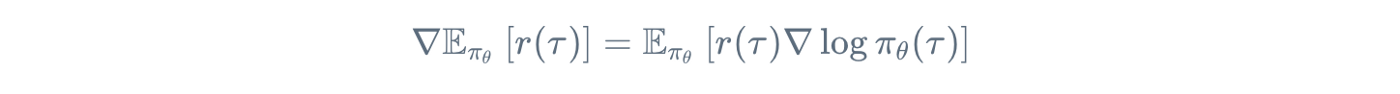

The key idea underlying policy gradients is **reinforcing good actions**: to push up the probabilities of actions that lead to higher return, until you arrive at the optimal policy. The policy gradient method will iteratively amend the policy network weights (with smooth updates) to make state-action pairs that resulted in positive return more likely, and make state-action pairs that resulted in negative return less likely. <br /> <br />
To introduce this idea we will start with a vanilla version (the basic version) of the policy gradient method called **REINFORCE algorithm**. This algorithm is the fundamental policy gradient algorithm on which nearly all the advanced policy gradient algorithms are based.

## REINFORCE Algorithm 
**REINFORCE**(Monte-Carlo policy gradient) relies on an estimated return by [Monte-Carlo](https://en.wikipedia.org/wiki/Monte_Carlo_method) methods using episode samples to update the policy parameter $\theta$.
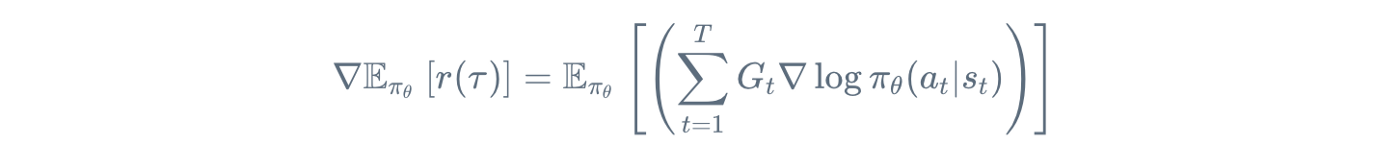

Therefore we are able to measure $G_{t}$ from real sample trajectories and use that to update our policy gradient. It relies on a full trajectory and that's why it is a Monte-Carlo method.

The final formula of the gradient of the objective function will be shown below, and the complete implementation is available by clicking on the [link](https://medium.com/@thechrisyoon/deriving-policy-gradients-and-implementing-reinforce-f887949bd63).
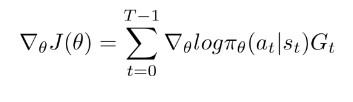 <br />
*where $𝐺_{t}$ represents the accumulated future reward $\sum_{t'=t+1} ^{T} \gamma^{t'-t-1} r_{t'}$*
<br /> <br />
Disadvantages of the REINFORCE policy gradient algorithm are:
+ noisy gradient
+ high variance

The calculation of the probability of the next action is performed using a neural network implemented in the [reinforce_model.py](reinforce/reinforce_model.py) file.

## Pseudo-code of REINFORCE Algorithm
The implementation of algorithm is in the [reinforce_agent.py](reinforce/reinforce_agent.py) file. <br />
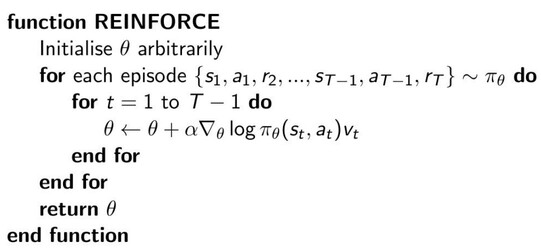

## Testing the algorithm on the Lunar Lander environment
To implement the algorithm, the ***TensorFlow-2*** library with ***Graph Mode*** was used to significantly speed up code execution.

In [1]:
import gym
import warnings
warnings.filterwarnings('ignore')

from reinforce.reinforce_agent import ReinforceAgent

The *hyperparameter values* on which the final agent was trained are as follows:

In [2]:
GAMMA = 0.99
LEARNING_RATE = 1e-2
NUM_HIDDEN_UNITS = 128

# For agent testing
ACTION = "TEST"

Agent's training and reward plot display across episodes:

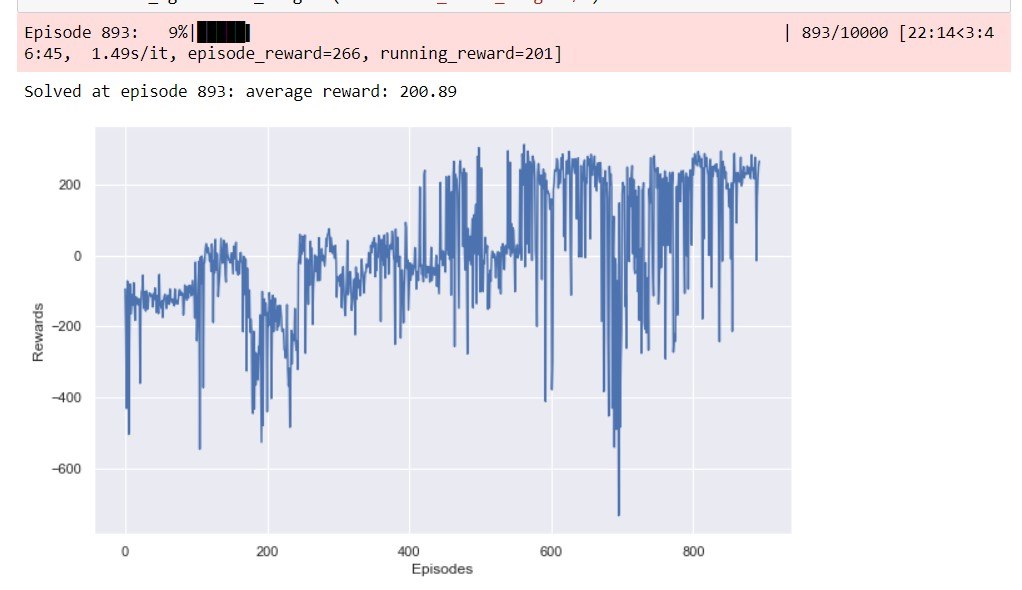

In [3]:
# Initialization of environment
env = gym.make("LunarLander-v2")

reinforce_agent = ReinforceAgent(env, GAMMA, LEARNING_RATE, NUM_HIDDEN_UNITS)

if ACTION == "TRAIN":
    reinforce_agent.train_agent()
else:
    reinforce_agent.load_weights('reinforce_model_weights/')

One episode of trained agent:

In [4]:
reinforce_agent.test_agent(display_episode=True)

Episode reward: 259.07!


## Conclusion
It is noticeable that the algorithm managed to beat the environment. A large dispersion is noticeable, which can be reduced by *tuning the hyperparameters* or by using more advanced algorithms.. ***Baseline*** is used as a more advanced version of the algorithm that accelerates convergence.